# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import statsmodels.api as sm

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
#len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


**Answer:** 400 observations

Observations with Missing data:
* 2 for GRE
* 2 for GPA
* 1 for prestige

> ### Question 2.  Create a summary table.

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [5]:
print "GRE min:",min(df['gre'])
print "GRE max:",max(df['gre'])
print "GPA min:",min(df['gpa'])
print "GPA max:",max(df['gpa'])

GRE min: 220.0
GRE max: 800.0
GPA min: 2.26
GPA max: 4.0


**Answer:** GRE has a larger range of values, therefore we should expect a larger variance.
* GRE Range: 220-800
* GPA Range: 2.26-4

> ### Question 4.  Drop data points with missing data.

In [6]:
#keep copy just in case
df_copy=df

#drop rows with missing values
df=df.dropna() 

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [7]:
# Check if any rows have missing values
print df.isnull().any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool


In [8]:
# Check original dataframe to see which rows had missing values
df_copy[df_copy.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [9]:
# Confirm these rows are not in the dataframe where we removed missing values
print 187 in df.index
print 212 in df.index
print 236 in df.index

False
False
False


**Answer:**
* There are no observations left in the dataframe "df" with missing data.
* We also double-checked that the three rows that had missing values (rownames=[187,212,236]) are no longer in the datafame "df" after using drop.na().

> ### Question 6.  Create boxplots for `gre` and `gpa`.

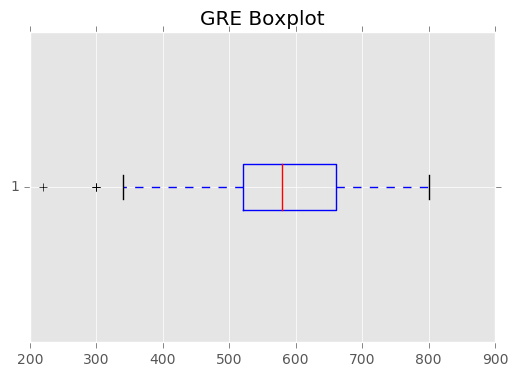

In [25]:
plt.title("GRE Boxplot")
plt.axis([200,900,0,1])
plt.boxplot(df['gre'],vert=False);

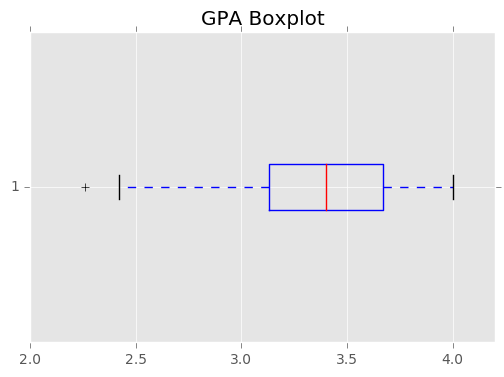

In [27]:
plt.title("GPA Boxplot")
plt.axis([2,4.2,0,1])
plt.boxplot(df['gpa'],vert=False); 

> ### Question 7.  What do boxplots show?

**Answer:**
* **GRE's distribution** is nearly symmetric, but there are are two outliers on the lower end at 220 and ~300
* **GPA's distribution** is skewed left (long tail at lower values) and that there is one outlier in the data at 2.26.

> ### Question 8.  Plot the distribution of each variable.

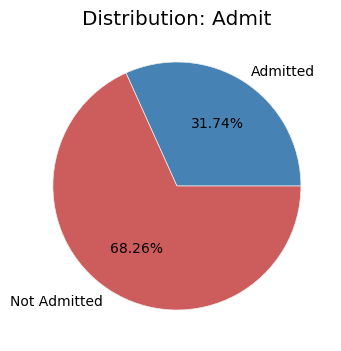

In [95]:
#admit
admitted = sum(df['admit']==1)
not_admitted = sum(df['admit']==0)

sizes=[admitted,not_admitted]
labels=['Admitted','Not Admitted']
colors=['steelblue','indianred']

plt.title("Distribution: Admit")
plt.axes().set_aspect('equal')
plt.pie(sizes,labels=labels,colors=colors,autopct="%.2f%%");

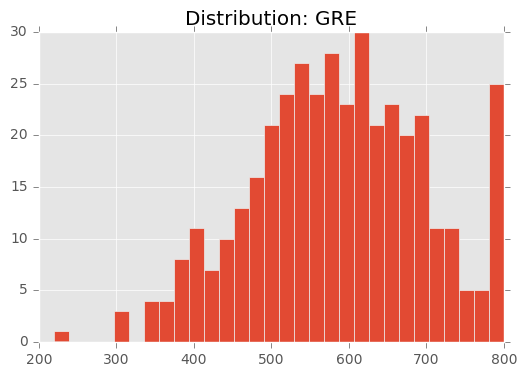

In [158]:
plt.title("Distribution: GRE")
plt.hist(df['gre'],bins=30);

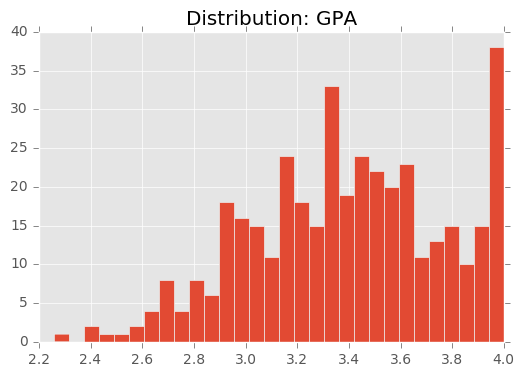

In [159]:
plt.title("Distribution: GPA")
plt.hist(df['gpa'],bins=30);

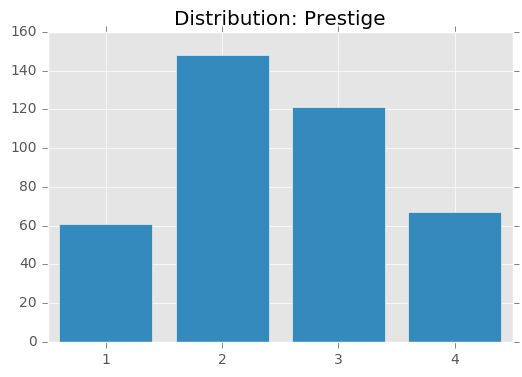

In [136]:
p1=sum(df['prestige']==1)
p2=sum(df['prestige']==2)
p3=sum(df['prestige']==3)
p4=sum(df['prestige']==4)

height=[p1,p2,p3,p4]
labels=['1','2','3','4']

plt.title("Distribution: Prestige")
plt.bar(left=range(1,5),height=height,tick_label=labels,align='center');

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)


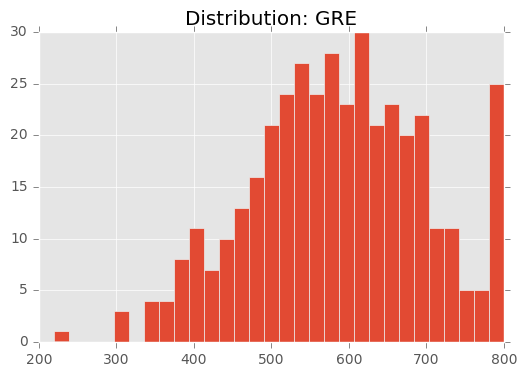

In [164]:
import scipy.stats as stats
print stats.normaltest(df['gre'])

plt.title("Distribution: GRE")
plt.hist(df['gre'],bins=30);

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)


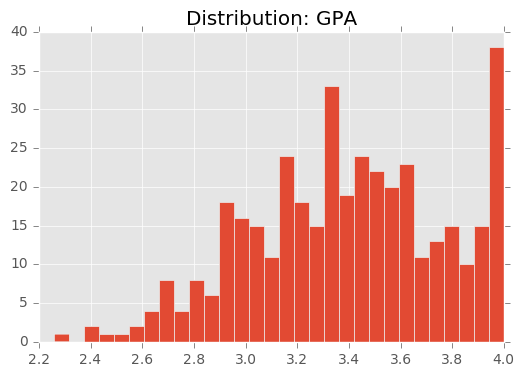

In [165]:
import scipy.stats as stats
print stats.normaltest(df['gpa'])

plt.title("Distribution: GPA")
plt.hist(df['gpa'],bins=30);

**Answer:**
* **GRE:** Based on the shape of the histogram, it is likely safe to assume GRE is normally distributed.
* **GPA:** Based on the shape of the histogram, we may have issues with assuming GPA is normally distributed.  In addition, the normal-test resulted in a very low p-value, meaning we can reject the null-hypothesis that the distribution is normal.  It would potentially be possible to transform the GPA distribution with a "Box-Cox Transformation" to try to make the distribution normal.

> ### Question 10.  Create a correlation matrix for the dataset

In [142]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

**Answer:**
* GRE AND GPA have some colinearity, but likely low enough to be OK (corr=0.38)
* It looks like higher GPA, higher GRE, and more prestige correlate with admission.  Note that prestige has a negative correlation since 1 is the highest prestige and 4 is the lowest

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

**Answer:**
* Find the correlation between each predictor (GRE,GPA,Presitge) and the outcome (Admit)
* Plot the relationship between each predictor and the outcome
* Develop a model that incorporates all 3 predictor's impact on the outcome (potentially logistic regression)

> ### Question 13.  What is your hypothesis?

**Answer:**
* Answer: Applicants are more likely to be admitted into UCLA's graduate school when they have higher GRE and GPA scores, and when they come from a more prestigious alma mater.